# ✳ Neural Network
## ✅ Output-layer 설계하기
### ▶ identity function & softmax function 구현
- Identity function : 입력을 그대로 출력
- softmax function
    - $y_k = \frac{exp(a_k)}{\displaystyle\sum_{i=1}^{n}{exp(a_i)}}$
        - $exp(x)$ : $e^x$ 를 뜻하는 지수함수
        - n : 출력층의 뉴런 수
        - $y_k$ : k번째 출력

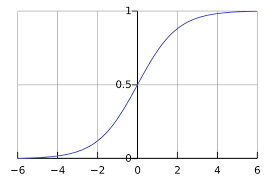

In [9]:
# softmax function
import numpy as np
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print('exp_a : ', exp_a)

sum_exp_a = np.sum(exp_a)
print('sum_exp_a : ', sum_exp_a)

y = exp_a / sum_exp_a
print('y : ', y)

def softmax(a):
    exp_a = np.exp(a) # 지수 함수
    sum_exp_a = np.sum(exp_a) # 지수 함수의 합
    y = exp_a / sum_exp_a # 결과
    
    return y

exp_a :  [ 1.34985881 18.17414537 54.59815003]
sum_exp_a :  74.1221542101633
y :  [0.01821127 0.24519181 0.73659691]


### ▶ overflow 문제
- 지수 함수는 아주 큰 값을 내기 때문에 overflow가 발생할 수 있다
- $C$라는 임의의 정수를 분자와 분모에 곱한 후 지수함수 안으로 옮겨 $logC$로 만들자.
    - $y_k = \frac{exp(a_k + C')}{\displaystyle\sum_{i=1}^{n}{exp(a_i + C')}}$
    - 여기서 $C'$ 는 $logC$를 의미

In [7]:
# 개선 전의 softmax function
a = np.array([1010, 1000, 990])
print('개선 전 : ', np.exp(a) / np.sum(np.exp(a))) # overflow error

# 개선된 softmax function
c = np.max(a) # 입력 신호 중 최댓값을 C로 선정
a -= c
print('개선 후 : ', np.exp(a) / np.sum(np.exp(a)))

개선 전 :  [nan nan nan]
개선 후 :  [9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\hyosun\AppData\Local\Temp\ipykernel_10612\3128829623.py:3: RuntimeWarning: overflow encountered in exp
  print('개선 전 : ', np.exp(a) / np.sum(np.exp(a))) # overflow error
C:\Users\hyosun\AppData\Local\Temp\ipykernel_10612\3128829623.py:3: RuntimeWarning: invalid value encountered in true_divide
  print('개선 전 : ', np.exp(a) / np.sum(np.exp(a))) # overflow error


### ▶ softmax function의 특징
- softmax function의 출력은 0~1 사이의 실수
- 모든 출력값의 합은 1

In [10]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


#### 모든 출력의 합이 1이라는 성질 때문에 softmax의 출력을 **'확률로 해석'** 할 수 있음
#### 위 출력의 예에서 y[0] = 0.018(1.8%), y[1] = 0.245(24.5%), y[2] = 0.737(73.7%)로 해석해볼 수 있다.
#### 그리고, softmax 를 사용해도 **각 원소의 대소관계는 변하지 않음**
#### 일반적으로 신경망의 분류에서는 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식하므로
#### sofmax 를 적용해도 출력이 가장 큰 뉴런의 위치는 변하지 X
#### ➡ 신경망으로 분류할 때는 softmax function을 생략해도 OK

### ▶ 출력층의 뉴런 수 정하기
- 분류에서는 **분류하고자 하는 class 수**로 설정
    - 입력 이미지를 0~9 중 하나로 분류하고자 한다면, 출력층의 뉴런을 10개로 설정
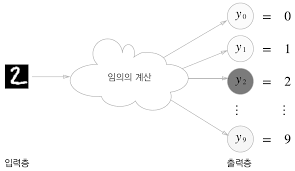

- 위 그림에서 출력층 뉴런은 차례로 숫자 0~9에 대응
- 뉴런의 회색 농도가 해당 뉴런의 출력값을 의미
    - 색이 가장 짙은 $y_2$뉴런이 가장 큰 값을 출력
    - 따라서 **이 신경망이 선택한 class는 $y_2$**, .즉 **입력 이미지를 숫자 '2'로 판단했음**을 의미